<a href="https://colab.research.google.com/github/NikitaSUAI/EventDetection/blob/main/shot_gun_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

import torchaudio
import matplotlib.pyplot as plt
import librosa.display
import torch 
from IPython.display import Audio, display
import torch.nn.functional

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Откроем файл и посмотрим как выглядит выстрел

In [ ]:
SHOT = Path("/content/drive/My Drive/EventDetection/Стрельба на улице.wav")
wav, sr = torchaudio.load(SHOT)
display(Audio((wav[0]), rate=sr))

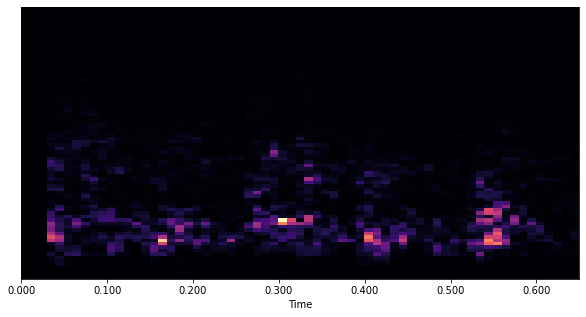

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

mfcc = torchaudio.transforms.MelSpectrogram(sr, n_fft=25 * sr//1000,\
                                                   hop_length = 10 * sr//1000,\
                                                   n_mels=80, 
                                                   norm="slaney", 
                                                   window_fn = torch.hamming_window)
mfcc_log = mfcc(wav)
librosa.display.specshow(mfcc_log.numpy()[0][:, 1225:1290], sr=sr, hop_length=10 * sr//1000,
                         x_axis='time', ax=ax)

# Определим пик выстрела и выставим порог

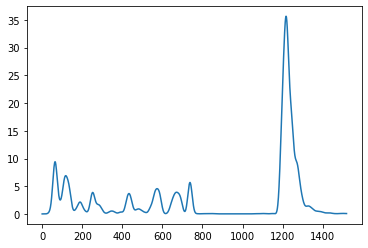

In [ ]:
max_amp = torch.argmax(torch.max(mfcc_log[0, :,  1225:1290], 1).values)
target_bin = torch.argmax(mfcc_log[0, :,  1225+max_amp])
threshing = torch.nn.functional.conv1d(mfcc_log[:, target_bin][:, None, :], torch.kaiser_window(70)[None, None, :])

plt.plot(threshing.numpy()[0, 0])

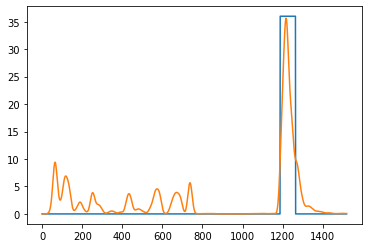

In [ ]:
thresholding = torch.zeros_like(threshing[0, 0])
thresholding[threshing[0, 0] > 10] = 1
plt.plot(thresholding.numpy() * 36)
plt.plot(threshing.numpy()[0, 0])

In [ ]:
start = torch.argmax(thresholding)
end = torch.argmin(thresholding[start:])
end += start 
start -= 1

start = int(start / 100 * sr)
end = int(end / 100 * sr)
(start, end)

(189920, 202400)

# Послушаем как звучит только выстрел

In [ ]:
wav, sr = torchaudio.load(SHOT)
display(Audio((wav[0, start:end ]), rate=sr))